In [2]:
#import necessary libraries for data wrangling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries and modules
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import metrics
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report, plot_roc_curve, auc, plot_confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import plotly

### Load datasets
-----

In [3]:
fire_nrt_1_modis = pd.read_csv(r'C:\Users\Atrey\Documents\fire_nrt_M6_96619.csv')
fire_nrt_1_modis

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183588,-32.675,122.113,300.5,2.4,1.5,2020-01-11,1515,Terra,MODIS,19,6.0NRT,289.3,15.3,N
183589,-16.708,129.646,300.5,1.0,1.0,2020-01-11,1645,Aqua,MODIS,16,6.0NRT,280.8,2.9,N
183590,-16.747,129.653,301.8,1.0,1.0,2020-01-11,1645,Aqua,MODIS,23,6.0NRT,277.9,3.7,N
183591,-32.484,121.319,306.5,1.4,1.2,2020-01-11,1650,Aqua,MODIS,68,6.0NRT,291.9,11.6,N


In [4]:
fire_arc_1_modis = pd.read_csv(r'C:\Users\Atrey\Documents\fire_archive_M6_96619.csv')
fire_arc_1_modis

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [5]:
fire_nrt_2_viirs = pd.read_csv(r'C:\Users\Atrey\Documents\fire_nrt_V1_96617.csv')
fire_nrt_2_viirs

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


In [6]:
fire_arc_2_viirs = pd.read_csv(r'C:\Users\Atrey\Documents\fire_archive_V1_96617.csv')
fire_arc_2_viirs

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,-34.45902,150.88040,326.5,0.60,0.71,2019-08-01,246,N,VIIRS,n,1,290.7,5.8,3
1,-31.70724,151.07191,367.0,0.56,0.69,2019-08-01,247,N,VIIRS,h,1,291.9,10.4,0
2,-31.39626,149.65253,325.2,0.68,0.74,2019-08-01,247,N,VIIRS,n,1,292.7,5.6,0
3,-30.39774,152.06432,347.8,0.48,0.65,2019-08-01,247,N,VIIRS,n,1,287.6,9.1,0
4,-31.20248,151.89766,350.7,0.50,0.66,2019-08-01,247,N,VIIRS,n,1,292.3,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184773,-32.37209,116.10032,296.1,0.48,0.40,2019-09-30,1702,N,VIIRS,n,1,284.8,1.2,0
184774,-32.38958,116.11151,296.1,0.48,0.40,2019-09-30,1702,N,VIIRS,n,1,284.7,1.1,0
184775,-33.12481,116.03968,299.9,0.47,0.40,2019-09-30,1702,N,VIIRS,n,1,285.0,1.3,0
184776,-33.63480,122.92641,296.2,0.43,0.38,2019-09-30,1702,N,VIIRS,n,1,285.9,0.5,0


### Identify data types for each variable 
-----

In [7]:
fire_nrt_1_modis.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [8]:
fire_arc_1_modis.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

In [9]:
fire_nrt_2_viirs.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [10]:
fire_arc_2_viirs.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version         int64
bright_ti5    float64
frp           float64
type            int64
dtype: object

### Convert variables to necessary data types
------

In [11]:
#Convert to integers
fire_nrt_1_modis['confidence'] = fire_nrt_1_modis['confidence'].astype('int64')
fire_arc_1_modis['confidence'] = fire_arc_1_modis['confidence'].astype('int64')

#Convert to datetime 
fire_nrt_1_modis['acq_date'] = fire_nrt_1_modis['acq_date'].astype('datetime64[ns]')
fire_arc_1_modis['acq_date'] = fire_arc_1_modis['acq_date'].astype('datetime64[ns]')

#Convert to string
fire_nrt_1_modis['acq_time'] = fire_nrt_1_modis['acq_time'].astype(str)
fire_arc_1_modis['acq_time'] = fire_arc_1_modis['acq_time'].astype(str)

### Check data types again to check that it works
------

In [12]:
fire_nrt_1_modis.dtypes

latitude             float64
longitude            float64
brightness           float64
scan                 float64
track                float64
acq_date      datetime64[ns]
acq_time              object
satellite             object
instrument            object
confidence             int64
version               object
bright_t31           float64
frp                  float64
daynight              object
dtype: object

In [13]:
fire_arc_1_modis.dtypes

latitude             float64
longitude            float64
brightness           float64
scan                 float64
track                float64
acq_date      datetime64[ns]
acq_time              object
satellite             object
instrument            object
confidence             int64
version              float64
bright_t31           float64
frp                  float64
daynight              object
type                   int64
dtype: object

### Which time of the day result is the most dangerous confidence levels?
----

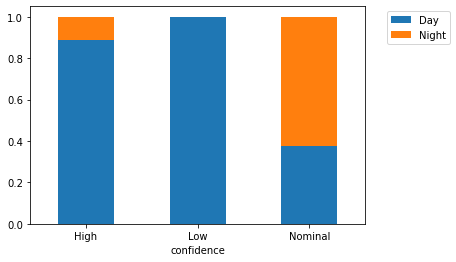

In [14]:
#Create cross tabs for stacked charts
plot = pd.crosstab(fire_nrt_2_viirs['confidence'], fire_nrt_2_viirs['daynight'], normalize = "index")
bar = plot.plot.bar(stacked=True, rot = 360)
bar.set_xticklabels(['High','Low','Nominal'])
plt.legend(['Day','Night'], bbox_to_anchor=(1.05, 1), loc='upper left')

### Compare relative frequencies of confidence for VIIRS
----

[Text(0, 0, 'Nominal'), Text(1, 0, 'High'), Text(2, 0, 'Low')]

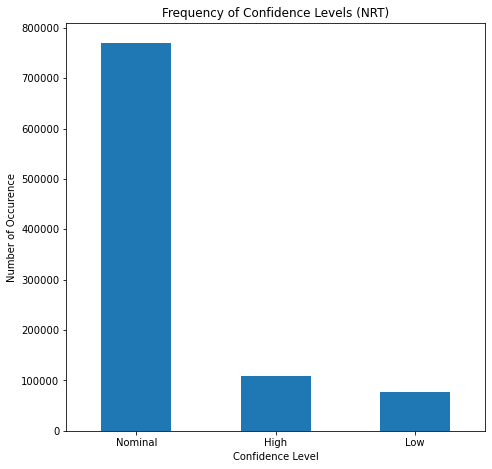

In [14]:
#Display frequency of confidence levels
plt.figure(figsize=(7.5,7.5))
a = fire_nrt_2_viirs['confidence'].value_counts().plot.bar(rot=360)
a.set_title("Frequency of Confidence Levels (NRT)")
a.set_ylabel('Number of Occurence')
a.set_xlabel('Confidence Level')
a.set_xticklabels(['Nominal','High','Low'])

[Text(0, 0, 'Nominal'), Text(1, 0, 'High'), Text(2, 0, 'Low')]

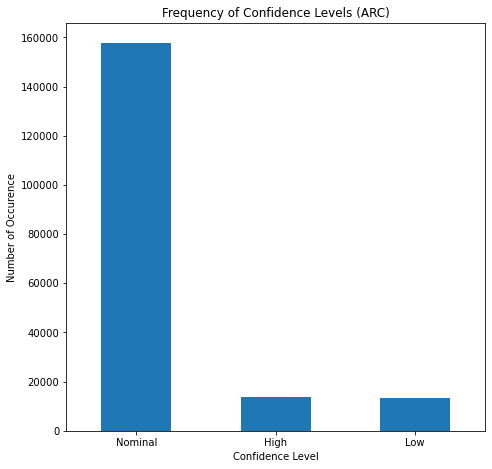

In [15]:
#Identify number of coincidence levels for ARC
plt.figure(figsize=(7.5,7.5))
a = fire_arc_2_viirs['confidence'].value_counts().plot.bar(rot=360)
a.set_title("Frequency of Confidence Levels (ARC)")
a.set_ylabel('Number of Occurence')
a.set_xlabel("Confidence Level")
a.set_xticklabels(['Nominal','High','Low'])

### What is the general trend for Near Real Time vs Standard Quality Data regarding confidence?
----

<AxesSubplot:xlabel='acq_date', ylabel='confidence'>

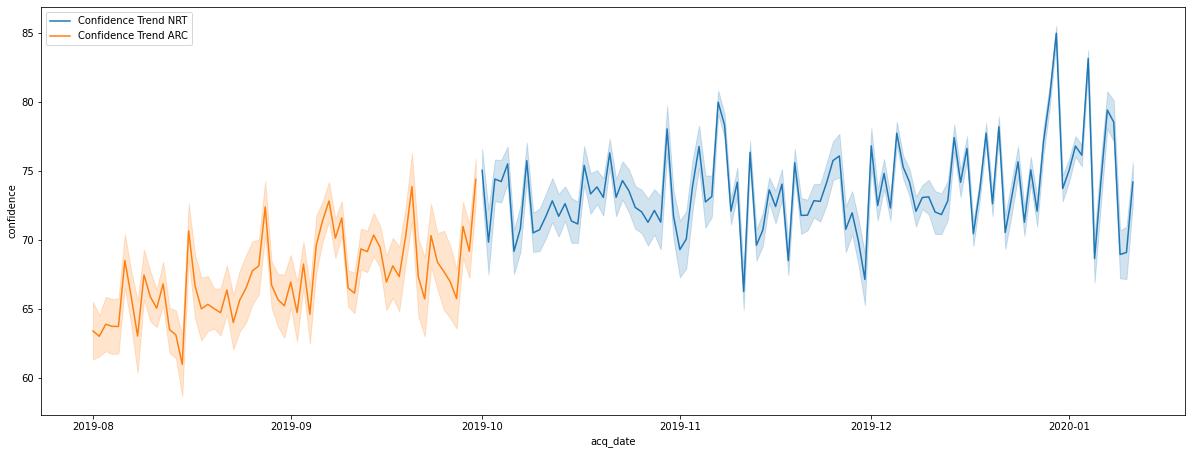

In [16]:
#Analyze time-series trend of confidence levels overtime
plt.figure(figsize=(20.5,7.5))
sns.lineplot(data = fire_nrt_1_modis, x = 'acq_date', y = 'confidence', label = "Confidence Trend NRT")
sns.lineplot(data = fire_arc_1_modis, x = 'acq_date', y = 'confidence', label = "Confidence Trend ARC")

### Which latitude and longitude resulted in the highest concentration of "h", "l" and "n" confidence? (VIIRS NRT)
-----

<Figure size 900x900 with 0 Axes>

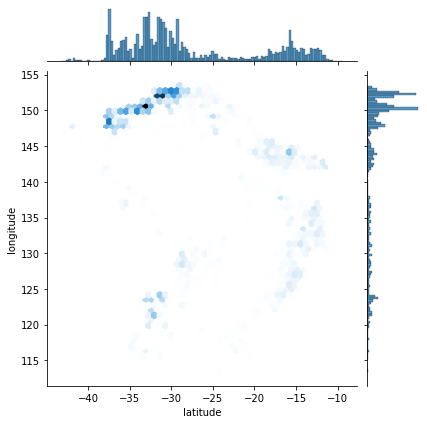

In [15]:
#Produce heatmaps to identify concentrations of each confidence for each coordinate
plt.figure(figsize=(12.5,12.5))
nom_nrt_2_viirs = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'n']
sns.jointplot(x='latitude', y='longitude', data = nom_nrt_2_viirs, kind='hex')


<Figure size 900x900 with 0 Axes>

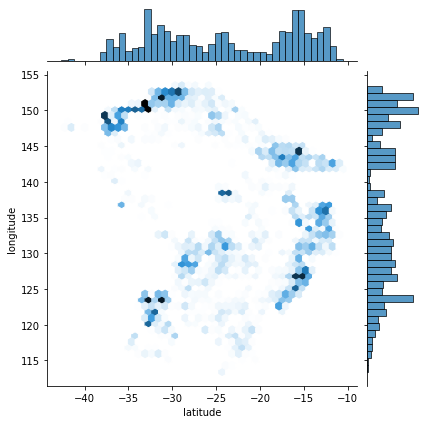

In [18]:
plt.figure(figsize=(12.5,12.5))
low_nrt_2_viirs = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'l']
sns.jointplot(x='latitude', y='longitude', data = low_nrt_2_viirs, kind='hex')

<Figure size 900x900 with 0 Axes>

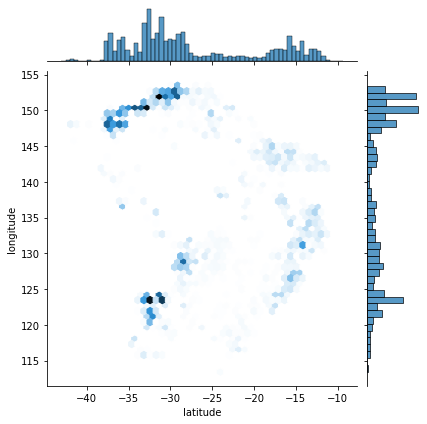

In [19]:
plt.figure(figsize=(12.5,12.5))
high_nrt_2_viirs = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'h']
sns.jointplot(x='latitude', y='longitude', data = high_nrt_2_viirs, kind='hex')

### Which latitude and longitude resulted in the highest concentration of "h", "l" and "n" confidence? (VIIRS ARC)
-----

<Figure size 900x900 with 0 Axes>

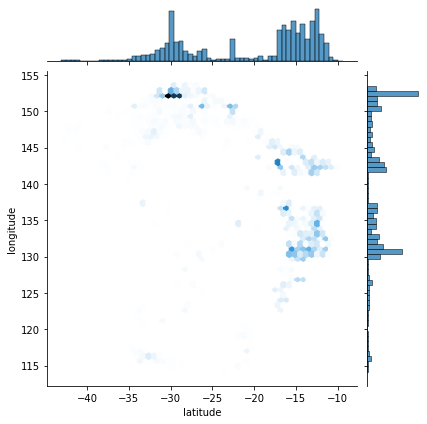

In [20]:
plt.figure(figsize=(12.5,12.5))
nom_arc_2_viirs = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'n']
sns.jointplot(x='latitude', y='longitude', data = nom_arc_2_viirs, kind='hex')

<Figure size 900x900 with 0 Axes>

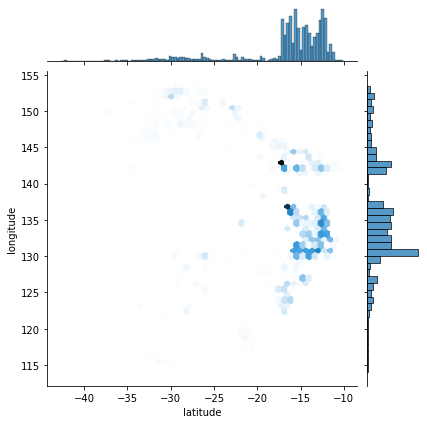

In [21]:
plt.figure(figsize=(12.5,12.5))
low_arc_2_viirs = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'l']
sns.jointplot(x='latitude', y='longitude', data = low_arc_2_viirs, kind='hex')

<Figure size 900x900 with 0 Axes>

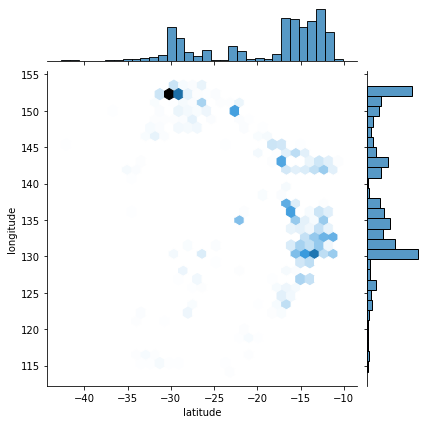

In [22]:
plt.figure(figsize=(12.5,12.5))
high_arc_2_viirs = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'h']
sns.jointplot(x='latitude', y='longitude', data = high_arc_2_viirs, kind='hex')

### What was the total amongst each confidence level over time?
----

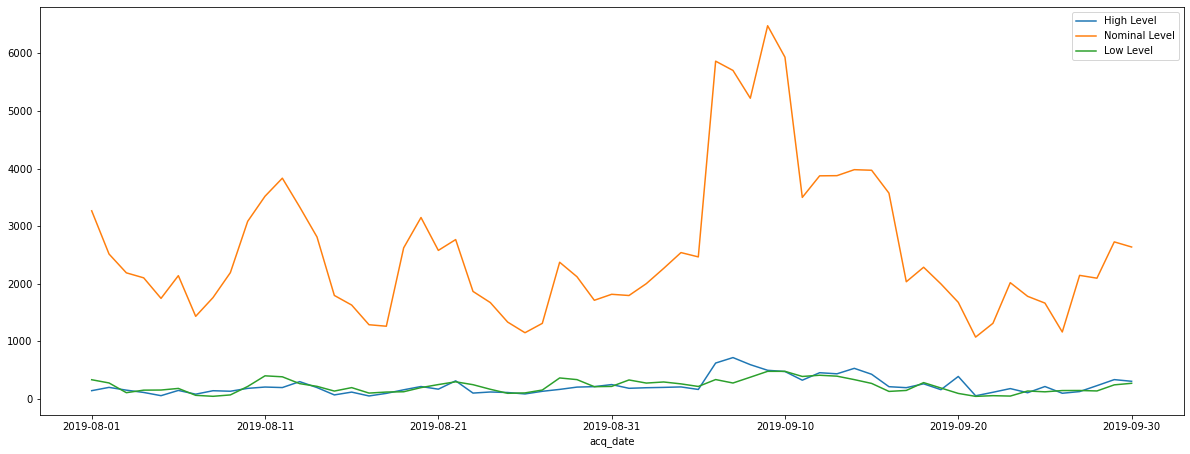

In [23]:
#Identify confidence levels INDIVIDUALLY overtime
plt.figure(figsize=(20.5,7.5))
worst_months_arc = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'h']
nom_months_arc = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'n']
low_months_arc = fire_arc_2_viirs.loc[fire_arc_2_viirs['confidence'] == 'l']
worst_months_arc.groupby('acq_date')['confidence'].count().plot()
nom_months_arc.groupby('acq_date')['confidence'].count().plot()
low_months_arc.groupby('acq_date')['confidence'].count().plot()
plt.legend(['High Level', 'Nominal Level', 'Low Level'])

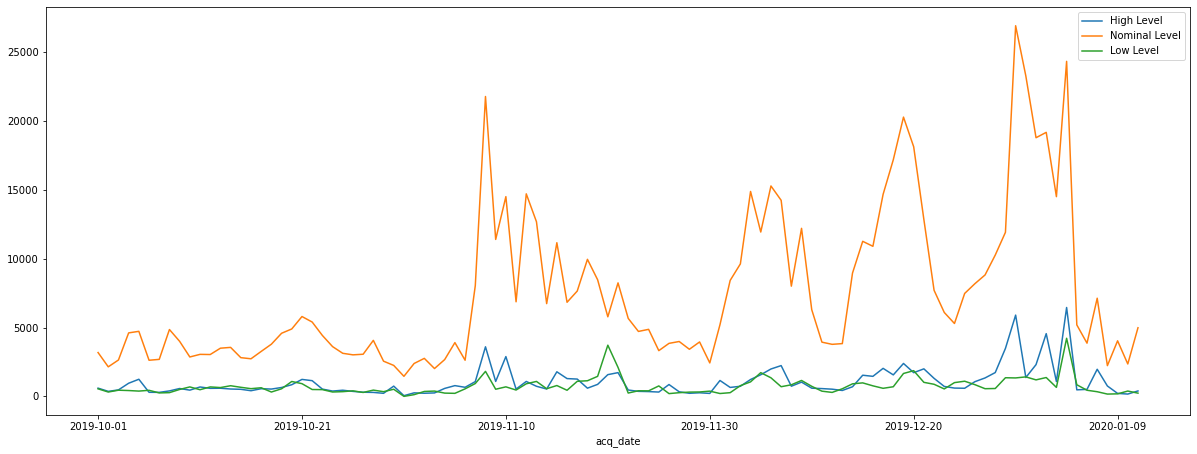

In [24]:
plt.figure(figsize=(20.5,7.5))
worst_months_nrt = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'h']
nom_months_nrt = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'n']
low_months_nrt = fire_nrt_2_viirs.loc[fire_nrt_2_viirs['confidence'] == 'l']
worst_months_nrt.groupby('acq_date')['confidence'].count().plot()
nom_months_nrt.groupby('acq_date')['confidence'].count().plot()
low_months_nrt.groupby('acq_date')['confidence'].count().plot()
plt.legend(['High Level', 'Nominal Level', 'Low Level'])

### Check for correlations
------

In [25]:
fire_arc_2_viirs.corr()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
latitude,1.000000,-0.598336,0.176399,-0.020348,-0.006508,-0.142004,NaN,0.390039,0.018531,-0.068043
longitude,-0.598336,1.000000,-0.139049,-0.013641,-0.035377,0.050549,NaN,-0.324462,-0.031141,-0.014470
bright_ti4,0.176399,-0.139049,1.000000,-0.045501,-0.000385,-0.778073,NaN,0.748308,0.410288,-0.040702
scan,-0.020348,-0.013641,-0.045501,1.000000,0.518411,0.017759,NaN,-0.097949,0.086054,-0.006792
track,-0.006508,-0.035377,-0.000385,0.518411,1.000000,-0.011938,NaN,-0.143729,0.029118,-0.009883
acq_time,-0.142004,0.050549,-0.778073,0.017759,-0.011938,1.000000,NaN,-0.743288,-0.316053,0.036951
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bright_ti5,0.390039,-0.324462,0.748308,-0.097949,-0.143729,-0.743288,NaN,1.000000,0.450946,-0.051643
frp,0.018531,-0.031141,0.410288,0.086054,0.029118,-0.316053,NaN,0.450946,1.000000,-0.015448
type,-0.068043,-0.014470,-0.040702,-0.006792,-0.009883,0.036951,NaN,-0.051643,-0.015448,1.000000


In [26]:
fire_nrt_2_viirs.corr()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
latitude,1.000000,-0.387443,0.134567,0.031505,0.093681,-0.229146,0.230467,-0.068471
longitude,-0.387443,1.000000,-0.195861,-0.050957,-0.151615,0.102090,-0.284327,-0.052351
bright_ti4,0.134567,-0.195861,1.000000,-0.039062,-0.012238,-0.721616,0.673757,0.288359
scan,0.031505,-0.050957,-0.039062,1.000000,0.531226,-0.020439,-0.073096,0.019758
track,0.093681,-0.151615,-0.012238,0.531226,1.000000,-0.089005,-0.111640,-0.014334
acq_time,-0.229146,0.102090,-0.721616,-0.020439,-0.089005,1.000000,-0.632816,-0.222458
bright_ti5,0.230467,-0.284327,0.673757,-0.073096,-0.111640,-0.632816,1.000000,0.436553
frp,-0.068471,-0.052351,0.288359,0.019758,-0.014334,-0.222458,0.436553,1.000000


In [27]:
fire_nrt_1_modis.corr()

,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp
latitude,1.000000,-0.423848,-0.092697,0.087863,0.095358,-0.067767,0.190202,-0.096936
longitude,-0.423848,1.000000,-0.109479,-0.133782,-0.140280,-0.053365,-0.318067,-0.064489
brightness,-0.092697,-0.109479,1.000000,-0.106089,-0.112081,0.525332,0.681943,0.632303
scan,0.087863,-0.133782,-0.106089,1.000000,0.983214,-0.099611,-0.095006,0.184709
track,0.095358,-0.140280,-0.112081,0.983214,1.000000,-0.104930,-0.096482,0.180186
confidence,-0.067767,-0.053365,0.525332,-0.099611,-0.104930,1.000000,0.261652,0.248910
bright_t31,0.190202,-0.318067,0.681943,-0.095006,-0.096482,0.261652,1.000000,0.368723
frp,-0.096936,-0.064489,0.632303,0.184709,0.180186,0.248910,0.368723,1.000000


In [28]:
fire_arc_1_modis.corr()

,latitude,longitude,brightness,scan,track,confidence,version,bright_t31,frp,type
latitude,1.000000,-0.582625,0.141667,0.037364,0.039265,0.020656,NaN,0.404679,-0.014094,-0.081140
longitude,-0.582625,1.000000,-0.104097,-0.051840,-0.054767,-0.035529,NaN,-0.380406,0.000449,0.005580
brightness,0.141667,-0.104097,1.000000,-0.105940,-0.108572,0.614691,NaN,0.606844,0.661131,-0.054160
scan,0.037364,-0.051840,-0.105940,1.000000,0.982484,-0.103808,NaN,-0.094356,0.292117,-0.024130
track,0.039265,-0.054767,-0.108572,0.982484,1.000000,-0.105949,NaN,-0.092064,0.286563,-0.024460
confidence,0.020656,-0.035529,0.614691,-0.103808,-0.105949,1.000000,NaN,0.238506,0.355388,-0.041632
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bright_t31,0.404679,-0.380406,0.606844,-0.094356,-0.092064,0.238506,NaN,1.000000,0.216824,-0.054393
frp,-0.014094,0.000449,0.661131,0.292117,0.286563,0.355388,NaN,0.216824,1.000000,-0.026688
type,-0.081140,0.005580,-0.054160,-0.024130,-0.024460,-0.041632,NaN,-0.054393,-0.026688,1.000000


### Decision Tree for Standard Quality/Lag Data

In [29]:
#Get features
X = fire_arc_2_viirs[['latitude','longitude','bright_ti4','scan','track', 'bright_ti5', 'frp']]
X

,latitude,longitude,bright_ti4,scan,track,bright_ti5,frp
0,-34.45902,150.88040,326.5,0.60,0.71,290.7,5.8
1,-31.70724,151.07191,367.0,0.56,0.69,291.9,10.4
2,-31.39626,149.65253,325.2,0.68,0.74,292.7,5.6
3,-30.39774,152.06432,347.8,0.48,0.65,287.6,9.1
4,-31.20248,151.89766,350.7,0.50,0.66,292.3,9.4
...,...,...,...,...,...,...,...
184773,-32.37209,116.10032,296.1,0.48,0.40,284.8,1.2
184774,-32.38958,116.11151,296.1,0.48,0.40,284.7,1.1
184775,-33.12481,116.03968,299.9,0.47,0.40,285.0,1.3
184776,-33.63480,122.92641,296.2,0.43,0.38,285.9,0.5


In [30]:
#Get targets
y = fire_arc_2_viirs[['confidence']]
y

,confidence
0,n
1,h
2,n
3,n
4,n
...,...
184773,n
184774,n
184775,n
184776,n


In [31]:
#Identify counts of each confidence
y.value_counts()

confidence
n             157925
h              13597
l              13256
dtype: int64

In [35]:
#Split data between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
#Initialize decision trees
dt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 20)

In [37]:
#Perform grid search
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(10, 30, 10)},
                  n_jobs=1,
                  scoring='accuracy', verbose = 10)

#Begin fitting for tuned parameters 
gs.fit(X_train, y_train)

#identify best parameters 
print(gs.best_params_)
print(-gs.best_score_)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5; 1/38] START max_depth=1, min_samples_split=10..........................
[CV 1/5; 1/38] END max_depth=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 2/5; 1/38] START max_depth=1, min_samples_split=10..........................
[CV 2/5; 1/38] END max_depth=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 3/5; 1/38] START max_depth=1, min_samples_split=10..........................
[CV 3/5; 1/38] END max_depth=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 4/5; 1/38] START max_depth=1, min_samples_split=10..........................
[CV 4/5; 1/38] END max_depth=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 5/5; 1/38] START max_depth=1, min_samples_split=10..........................
[CV 5/5; 1/38] END max_depth=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 1/5; 2/38] START max_depth=1, min_samples_split=20..........................
[CV 1/5; 2/38] END max

In [47]:
#Fit decision tree
fit = dt.fit(X_train, y_train)

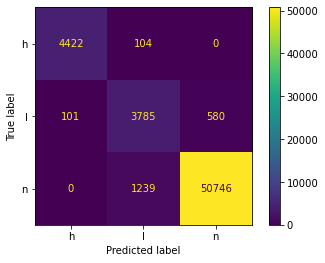

In [48]:
#Plot confusion matrix
plot_confusion_matrix(fit, X_test, y_test)

In [49]:
#test the test set and calculate accuracy
y_pred = fit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.966807156796825


In [50]:
#Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           h       0.98      0.98      0.98      4526
           l       0.74      0.85      0.79      4466
           n       0.99      0.98      0.98     51985

    accuracy                           0.97     60977
   macro avg       0.90      0.93      0.92     60977
weighted avg       0.97      0.97      0.97     60977



In [58]:
#Print training set accuracy
y_pred_train = fit.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.9733039313091171


In [59]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           h       0.99      0.99      0.99      9071
           l       0.77      0.89      0.83      8790
           n       0.99      0.98      0.99    105940

    accuracy                           0.97    123801
   macro avg       0.92      0.95      0.93    123801
weighted avg       0.98      0.97      0.97    123801



In [127]:
fit.predict([[-13.44413, 132.74624, 335, 0.47, 0.39, 312.4, 6.2]])

array(['l'], dtype=object)

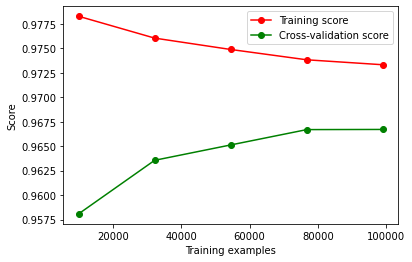

In [97]:
#View validation training performance
from sklearn.model_selection import learning_curve

#calculate shuffle and splits for learning curve
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(fit, X_train, y_train, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

#calculate scores 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")



### Decision Tree Analysis of Near Real Time data

In [72]:
#Repeat the analysis as before for NRT set
X_nrt = fire_nrt_2_viirs[['latitude','longitude','bright_ti4','scan','track', 'bright_ti5', 'frp']]
X_nrt

,latitude,longitude,bright_ti4,scan,track,bright_ti5,frp
0,-42.69706,147.70634,333.6,0.57,0.43,293.4,4.0
1,-42.26889,147.31104,336.2,0.39,0.44,296.9,3.9
2,-40.85202,145.38068,327.9,0.46,0.47,295.3,3.7
3,-42.39329,147.47144,346.9,0.38,0.43,294.2,6.2
4,-42.69701,147.70584,334.1,0.56,0.43,293.5,4.1
...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,288.6,0.8
956253,-32.58616,123.39582,299.0,0.51,0.41,287.4,0.7
956254,-33.37853,115.94735,309.7,0.40,0.60,291.7,1.0
956255,-33.21827,115.75078,300.2,0.49,0.65,290.2,1.1


In [73]:
#Get targets
y_nrt = fire_nrt_2_viirs[['confidence']]
y_nrt

,confidence
0,n
1,n
2,n
3,n
4,n
...,...
956252,n
956253,n
956254,n
956255,n


In [74]:
#Find confidence coutns
y_nrt.value_counts()

confidence
n             771035
h             108407
l              76815
dtype: int64

In [75]:
#Split data
X_train_nrt, X_test_nrt, y_train_nrt, y_test_nrt = train_test_split(X_nrt, y_nrt, test_size=0.33, random_state=42)

In [78]:
#initialize decision tree
dt_nrt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 20)

In [77]:
#Grid search of decision tree function
gs_nrt = GridSearchCV(dt_nrt,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(10, 40, 10)},
                  n_jobs=1,
                  scoring='accuracy', verbose = 10)

gs_nrt.fit(X_train_nrt, y_train_nrt)

print(gs.best_params_)
print(-gs.best_score_)

Fitting 5 folds for each of 57 candidates, totalling 285 fits
[CV 1/5; 1/57] START max_depth=1, min_samples_split=10..........................
[CV 1/5; 1/57] END max_depth=1, min_samples_split=10;, score=0.919 total time=   1.8s
[CV 2/5; 1/57] START max_depth=1, min_samples_split=10..........................
[CV 2/5; 1/57] END max_depth=1, min_samples_split=10;, score=0.919 total time=   1.9s
[CV 3/5; 1/57] START max_depth=1, min_samples_split=10..........................
[CV 3/5; 1/57] END max_depth=1, min_samples_split=10;, score=0.919 total time=   1.9s
[CV 4/5; 1/57] START max_depth=1, min_samples_split=10..........................
[CV 4/5; 1/57] END max_depth=1, min_samples_split=10;, score=0.919 total time=   1.9s
[CV 5/5; 1/57] START max_depth=1, min_samples_split=10..........................
[CV 5/5; 1/57] END max_depth=1, min_samples_split=10;, score=0.919 total time=   1.9s
[CV 1/5; 2/57] START max_depth=1, min_samples_split=20..........................
[CV 1/5; 2/57] END max

In [79]:
#Fit decision tree
fit_nrt = dt_nrt.fit(X_train_nrt, y_train_nrt)

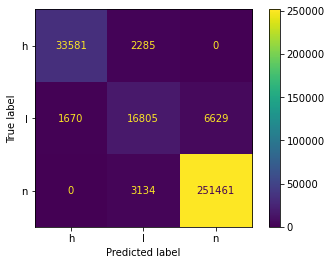

In [80]:
#Plot confusion matrix
plot_confusion_matrix(fit_nrt, X_test_nrt, y_test_nrt)

In [81]:
#find prediction and calculate accuracy
y_pred_nrt = fit_nrt.predict(X_test_nrt)
print("Accuracy:",metrics.accuracy_score(y_test_nrt, y_pred_nrt))

Accuracy: 0.9565287658644019


In [82]:
#view report
print(classification_report(y_test_nrt, y_pred_nrt))

              precision    recall  f1-score   support

           h       0.95      0.94      0.94     35866
           l       0.76      0.67      0.71     25104
           n       0.97      0.99      0.98    254595

    accuracy                           0.96    315565
   macro avg       0.89      0.86      0.88    315565
weighted avg       0.95      0.96      0.96    315565



In [83]:
#Find accuracy for train set
y_pred_train_nrt = fit_nrt.predict(X_train_nrt)
print("Accuracy:",metrics.accuracy_score(y_train_nrt, y_pred_train_nrt))

Accuracy: 0.9592144119171147


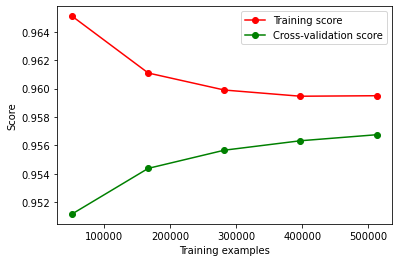

In [98]:
#view learning curve and shuffle data 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#calculate learning curves
train_sizes_nrt, train_scores_nrt, test_scores_nrt = learning_curve(fit_nrt, X_train_nrt, y_train_nrt, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
  
#calculate scores 
train_scores_mean_nrt = np.mean(train_scores_nrt, axis=1)
train_scores_std_nrt = np.std(train_scores_nrt, axis=1)
test_scores_mean_nrt = np.mean(test_scores_nrt, axis=1)
test_scores_std_nrt = np.std(test_scores_nrt, axis=1)

# Plot learning curve
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes_nrt, train_scores_mean_nrt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nrt, test_scores_mean_nrt, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

In [139]:
#predict a random example
fit_nrt.predict([[-37.5877, 147.20155, 369.3, 0.38, 0.62, 264.7, 12.9]])

array(['h'], dtype=object)